In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置matplotlib能显示中文

In [2]:
lianjia_data = pd.read_csv(r'C:\Users\Administrator\Desktop\task_2_lianjia_data.csv', encoding='utf-8')
lianjia_data.head()

,简介（方式·小区名 户型 朝向）,区,地铁站,村,面积大小（㎡）,朝向,户型,楼层类型,楼层（层）,标签
0,整租·长桥一村 1室0厅 南,徐汇,长桥,长桥一村,39,南,1室0厅1卫,高楼层,6,随时看房
1,整租·馨宁公寓 1室1厅 南,徐汇,华泾,馨宁公寓,42,南,1室1厅1卫,高楼层,29,"精装,随时看房"
2,整租·长桥三村 2室1厅 南,徐汇,长桥,长桥三村,51,南,2室1厅1卫,高楼层,6,随时看房
3,整租·东湾小区 1室1厅 南,徐汇,华泾,东湾小区,47,南,1室1厅1卫,中楼层,6,随时看房
4,整租·花苑村紫竹园 1室1厅 南,徐汇,康健,花苑村紫竹园,42,南,1室1厅1卫,高楼层,6,随时看房


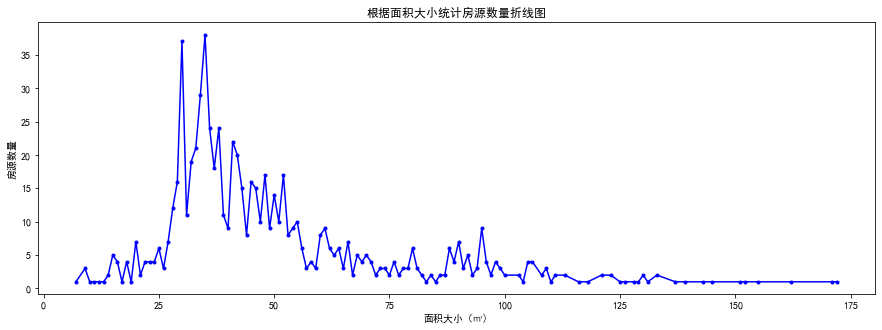

In [3]:
new_col=[('房源数量','count')]
area = lianjia_data.groupby('面积大小（㎡）')['标签'].agg(new_col)
area_x = area.index.values.tolist()
area_y = area['房源数量'].values.tolist()
plt.figure(figsize=(15,5))
plt.xlabel('面积大小（㎡)')  
plt.ylabel('房源数量')
plt.title('根据面积大小统计房源数量折线图')
plt.plot(area_x, area_y, 'b.-')
plt.show()

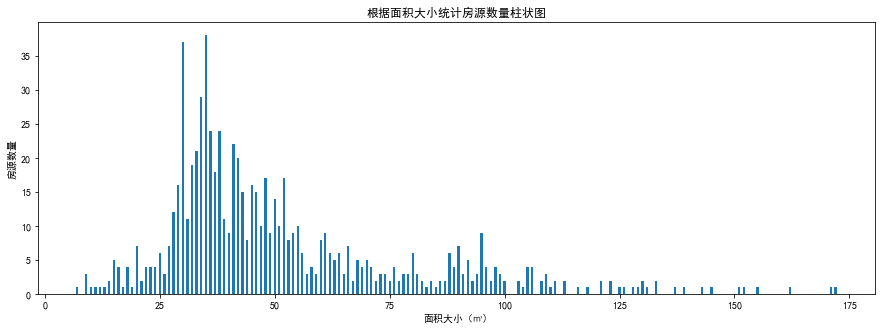

In [4]:
plt.figure(figsize=(15,5))
plt.title('根据面积大小统计房源数量柱状图')
plt.xlabel('面积大小（㎡)')  
plt.ylabel('房源数量')
plt.bar(area_x, area_y,alpha=1, width = 0.5, lw=1)
plt.show()

结论：根据链家数据分析表明面积在30㎡-50㎡之间的房源数量最多

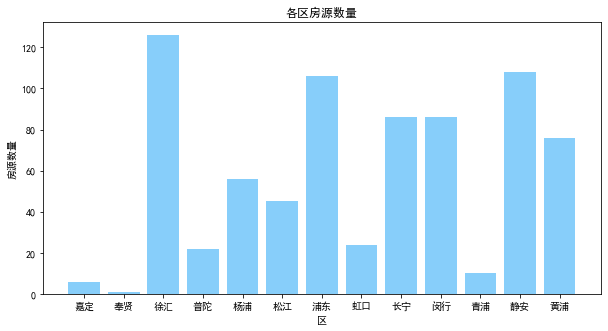

In [5]:
dis = lianjia_data.groupby('区')['标签'].agg(new_col)
dis_x = dis.index.values.tolist()
dis_y = dis['房源数量'].values.tolist()
plt.figure(figsize=(10,5))
plt.xlabel('区')
plt.ylabel('房源数量')
plt.title('各区房源数量')
plt.bar(dis_x, dis_y, facecolor = 'lightskyblue')
plt.show()

结论：根据图标显示出，徐汇区房源最多，奉贤区最少

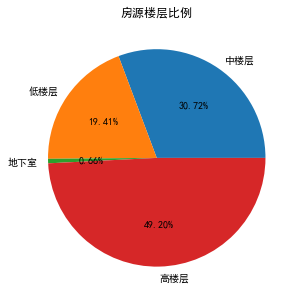

In [6]:
storey = lianjia_data.groupby('楼层类型')['标签'].agg(new_col)
x = storey.index.values.tolist()
storey_x = [i.rstrip() for i in x]
storey_y = storey['房源数量'].values.tolist()
plt.figure(figsize=(5,5))
plt.title('房源楼层比例')
plt.pie(storey_y, labels=storey_x, autopct='%.2f%%')
plt.show()

结论：从图中看出中高楼层房源居多，其中高楼层占49%